<a href="https://colab.research.google.com/github/Rstam59/TaskDataRepoForStudents/blob/main/California_house_prices_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/housing.csv

--2024-02-01 13:04:45--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  6.88MB/s    in 0.2s    

2024-02-01 13:04:46 (6.88 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [3]:
housing = pd.read_csv("/content/housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
from sklearn.model_selection import train_test_split

X = housing.drop('median_income', axis = 1)
y = housing['median_income'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
cat_features = X_train.select_dtypes(exclude = [np.number]).columns
num_features = X_train.select_dtypes(include = [np.number]).columns
num_features

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_house_value'],
      dtype='object')

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

transformer = ColumnTransformer([
    ('num', num_pipeline, ['total_bedrooms']),
    ('cat', cat_pipeline, cat_features)
], remainder = 'passthrough')

In [10]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

column_names = transformer.get_feature_names_out()

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns = column_names)
X_train_transformed_df

,num__total_bedrooms,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__longitude,remainder__latitude,remainder__housing_median_age,remainder__total_rooms,remainder__population,remainder__households,remainder__median_house_value
0,1164.0,1.0,0.0,0.0,0.0,0.0,-118.54,34.24,24.0,4631.0,2360.0,1083.0,264000.0
1,171.0,1.0,0.0,0.0,0.0,0.0,-117.67,33.60,20.0,1213.0,565.0,170.0,314800.0
2,497.0,1.0,0.0,0.0,0.0,0.0,-118.18,34.01,42.0,1845.0,2191.0,492.0,127300.0
3,430.0,1.0,0.0,0.0,0.0,0.0,-117.84,33.66,5.0,1688.0,857.0,402.0,231600.0
4,338.0,1.0,0.0,0.0,0.0,0.0,-118.33,33.89,42.0,1816.0,897.0,306.0,230800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,867.0,1.0,0.0,0.0,0.0,0.0,-118.13,33.89,33.0,3668.0,2368.0,845.0,204900.0
16508,388.0,1.0,0.0,0.0,0.0,0.0,-118.43,34.03,36.0,1552.0,867.0,352.0,346700.0
16509,486.0,0.0,1.0,0.0,0.0,0.0,-117.84,35.35,28.0,1913.0,858.0,371.0,50800.0
16510,1102.0,1.0,0.0,0.0,0.0,0.0,-118.68,34.28,17.0,6488.0,3199.0,1070.0,238000.0


In [11]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()

reg.fit(X_train_transformed_df, y_train)
reg.score(X_train_transformed_df, y_train)

0.9676000580593557

In [12]:
model_1_result = reg.score(X_test_transformed, y_test) * 100
model_1_result

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


78.63930883516133

#Analyizng Data

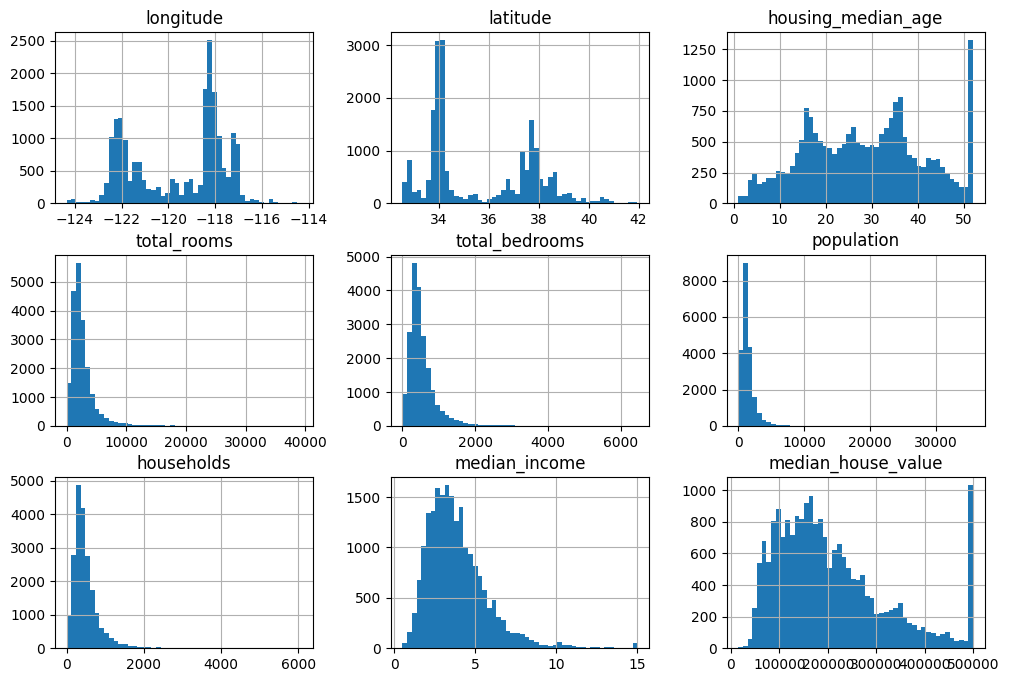

In [15]:
housing.hist(bins =50, figsize = (12, 8));

In [16]:
housing['median_income'].value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
           ..
4.2670      1
2.1217      1
4.9706      1
3.4450      1
2.0943      1
Name: median_income, Length: 12928, dtype: int64

In [17]:
housing.corr()['median_house_value'].sort_values(ascending = False) * 100


<ipython-input-17-9d3f2714fd87>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corr()['median_house_value'].sort_values(ascending = False) * 100


median_house_value    100.000000
median_income          68.807521
total_rooms            13.415311
housing_median_age     10.562341
households              6.584265
total_bedrooms          4.968618
population             -2.464968
longitude              -4.596662
latitude              -14.416028
Name: median_house_value, dtype: float64

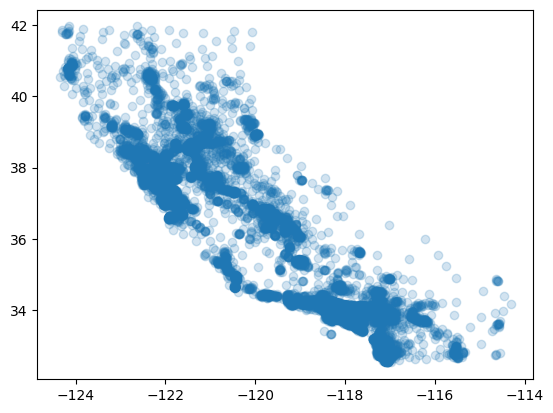

In [18]:
plt.scatter(housing['longitude'], housing['latitude'], alpha = 0.2)

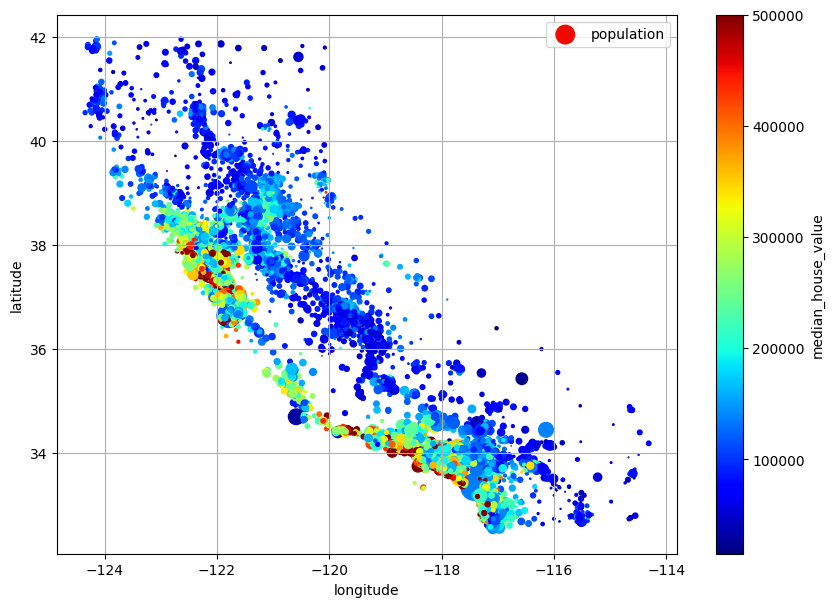

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True,figsize=(10, 7));

<Axes: >

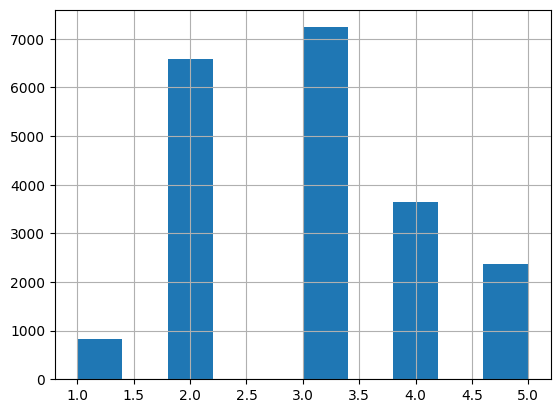

In [20]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins = [0., 1.5, 3.0, 4.5, 6, np.inf],
                               labels = [1, 2, 3, 4, 5])
housing['income_cat'].hist()